# Simulation 1


## Importing Libraries

We import basic libraries and modules for our simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as SGfilter
from IPython.display import clear_output
import datetime
import joblib
from tqdm import tqdm

import const
import utilities as ut
import mockSQLenv as SQLenv
import agent2 as agn
import generate_actions
my_actions = generate_actions.generate_actions()

## Setting up the model

We set up our environment.

In [2]:
env = SQLenv.mockSQLenv(verbose=True, flag_reward = 10, query_reward = -1)

Game setup with a random query


We instantiate an agent and look at its starting Q-table.

In [3]:
agt = agn.Agent(const.actions)
agt.set_learning_options(exploration=0.1, 
                         learningrate=0.1, 
                         discount=0.9, max_step = 1000)
print(agt.Q)
print(agt.total_successes, "/", agt.total_trials)

{(): array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}
0 / 0


## Running the model

We run an agent on our environment.

In [4]:
agt.reset(env)
agt.run_episode()

Game reset (but not reinitialized with a new random query!)
Game reset
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
unseen response 1
state2 ((1,),)
Server response is 1
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
state2 ((1,),)
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
unseen response -1
state2 ((1,), (2,))
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
state2 ((1,), (2,))
Server response is 1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
state2 ((1,), (2, 31))
Server response is -1
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
state2 ((1,), (2, 31))
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2

True

We then take a look at some statistics of the agent: its Q-table, the number of its entries, the number of steps taken, and the amount of reward.

In [5]:
agt.Q

{(): array([0.89, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]),
 ((1,),): array([0.89, 0.89, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]),
 ((1,),
  (2,)): array([0.89, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.89, 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1. 

In [6]:
print(ut.getdictshape(agt.Q))

(23, (51,))


In [7]:
print(agt.steps)

123


In [8]:
print(agt.rewards)

-112


## Training the agent

We train the agent over $10^6$ episodes.

In [ ]:

agt = agn.Agent(const.actions,verbose=False)
agt.set_learning_options(exploration=0.02, 
                         learningrate=0.1, 
                         discount=0.9, max_step = 1000)

steps = []; rewards = []; states = []

In [11]:
from IPython.display import clear_output
nepisodes = 10**8

for _ in tqdm(range(nepisodes)):
    #clear_output(wait=True)
    env = SQLenv.mockSQLenv(verbose=False)
    
    agt.reset(env)
    agt.run_episode()
    
    steps.append(agt.steps)
    rewards.append(agt.rewards)
    states.append(ut.getdictshape(agt.Q)[0])    

100%|██████████████████████████████████████████████████████████████████| 10000000/10000000 [1:12:46<00:00, 2290.31it/s]


We save its Q-matrix.

In [12]:
timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S%f")
joblib.dump(agt.Q,'ignore_simul1_large_.pkl')
joblib.dump(agt.Q,'ignore_simul1_large_'+timestamp+'.pkl')
print("!#")

!#


## Analyzing the agent

We plot the variation in the number of states in the Q-matrix

Text(0, 0.5, 'number of states')

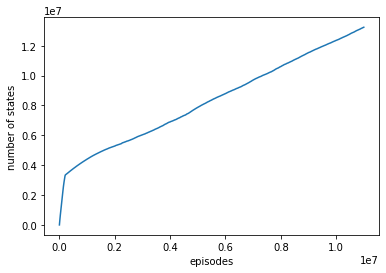

In [12]:
plt.plot(states)
plt.xlabel('episodes')
plt.ylabel('number of states')

We plot the number of steps per episode (averaged over 100 consecutive episodes and smoothing)

Text(0, 0.5, 'number of steps')

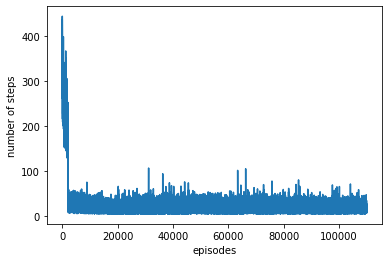

In [13]:
plt.plot(np.mean(np.array(steps).reshape(-1,100),axis=1))
plt.xlabel('episodes')
plt.ylabel('number of steps')

Text(0, 0.5, 'number of steps')

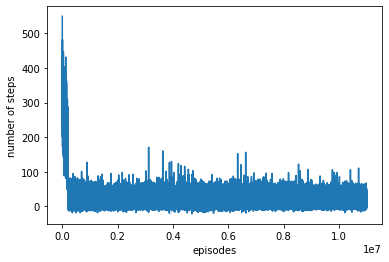

In [14]:
plt.plot(SGfilter(steps,101,3))
plt.xlabel('episodes')
plt.ylabel('number of steps')

We plot the amount of reward per episode (averaged over 100 consecutive episodes)

Text(0, 0.5, 'reward')

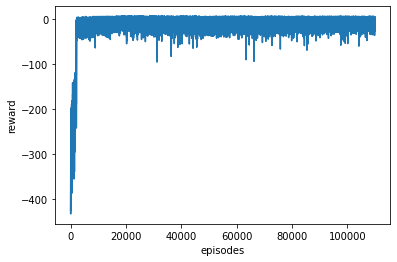

In [15]:
plt.plot(np.mean(np.array(rewards).reshape(-1,100),axis=1))
plt.xlabel('episodes')
plt.ylabel('reward')

We now further run the agent in a test setting for further $100$ epiodes, by making its policy deterministic and setting the exploration parameter $\epsilon$ to 0.

In [16]:
nepisodes = 1000

agt.set_learning_options(exploration=0.0)

Tsteps = []; Trewards = []; Tstates = []
for _ in tqdm(range(nepisodes)):
    env = SQLenv.mockSQLenv(verbose=False)
    
    agt.reset(env)
    agt.run_episode()
    
    Tsteps.append(agt.steps)
    Trewards.append(agt.rewards)
    Tstates.append(ut.getdictshape(agt.Q)[0])    

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1291.32it/s]


We plot the number of steps taken and their average.

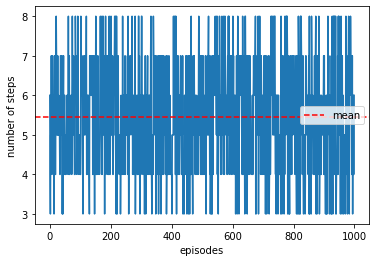

In [17]:
#plt.plot(np.mean(np.array(Tsteps).reshape(-1,10),axis=1))
plt.plot(Tsteps)
plt.xlabel('episodes')
plt.ylabel('number of steps')
plt.axhline(np.average(Tsteps),c='red',ls='--',label='mean')
plt.legend()

We plot the rewards and its average.

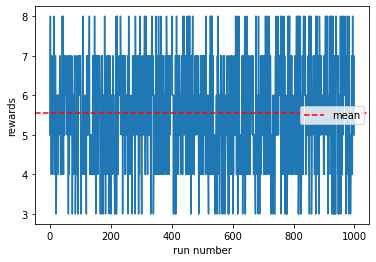

In [18]:
#plt.plot(np.mean(np.array(Trewards).reshape(-1,10),axis=1))
plt.plot(Trewards)
plt.xlabel('run number')
plt.ylabel('rewards')
plt.axhline(np.average(Trewards),c='red',ls='--',label='mean')
plt.legend()

17 ' and '1'='1


Text(0, 0.5, 'Q-value')

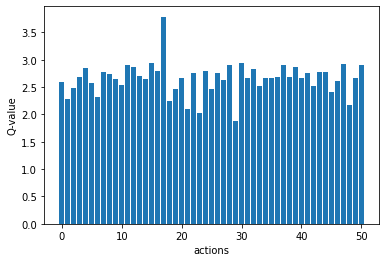

In [19]:
first_act = np.argmax(agt.Q[()])
print(first_act, my_actions[first_act])
plt.bar(np.arange(len(agt.Q[()])), agt.Q[()])
plt.xlabel('actions')
plt.ylabel('Q-value')

17 ' and '1'='1
34  and 1=1#


Text(0, 0.5, 'Q-value')

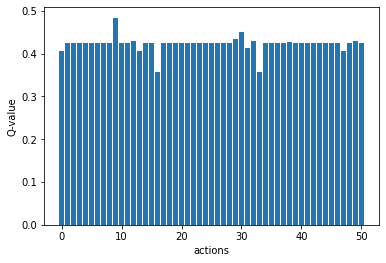

In [20]:
second_act = np.argmax(agt.Q[((first_act,),)])
print(first_act, my_actions[first_act])
print(second_act, my_actions[second_act])
plt.bar(np.arange(len(agt.Q[((first_act,second_act),)])), agt.Q[((first_act,second_act,),)])
plt.xlabel('actions')
plt.ylabel('Q-value')

17 ' and '1'='1
34  and 1=1#


Text(0, 0.5, 'Q-value')

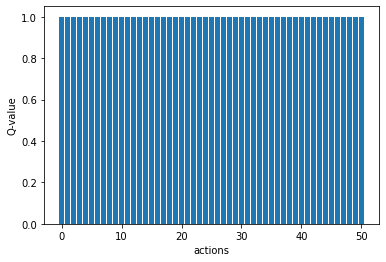

In [21]:
print(first_act, my_actions[first_act])
print(second_act, my_actions[second_act])
plt.bar(np.arange(len(agt.Q[((first_act,),(second_act,))])), agt.Q[((first_act,),(second_act,))])
plt.xlabel('actions')
plt.ylabel('Q-value')

In [22]:
print(agt.Q[((first_act,second_act),)])
print(agt.Q[((first_act,),(second_act,))])

[0.40731659 0.42612659 0.42612659 0.42612659 0.42612659 0.42612659
 0.42612659 0.42612659 0.42612659 0.48412346 0.42612659 0.42612659
 0.42864065 0.40618341 0.42612659 0.42612659 0.35628164 0.42612659
 0.42612659 0.42612659 0.42612659 0.42612659 0.42612659 0.42612659
 0.42612659 0.42612659 0.42612659 0.42612659 0.42612659 0.43333965
 0.45100877 0.41322609 0.42864065 0.35628164 0.42612659 0.42612659
 0.42612659 0.42612659 0.4267591  0.42612659 0.42612659 0.42612659
 0.42612659 0.42612659 0.42612659 0.42612659 0.42612659 0.40628582
 0.42612659 0.42909009 0.42612659]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]


In [23]:
third_act1 = np.argmax(agt.Q[((first_act,second_act),)])
print(first_act, my_actions[first_act])
print(second_act, my_actions[second_act])
print(third_act1, my_actions[third_act1])
print(agt.Q[((first_act,second_act),(1,))])
plt.bar(np.arange(len(agt.Q[((first_act,second_act,third_act1,),)])), agt.Q[((first_act,second_act,third_act,),)])
plt.xlabel('actions')
plt.ylabel('Q-value')

17 ' and '1'='1
34  and 1=1#
9 " union select 1,2,3,4 limit 1 offset 1#
[0.89 0.89 0.89 0.89 0.89 1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.  ]


KeyError: ((17, 34, 9),)

In [63]:
nepisodes = 100

agt.set_learning_options(exploration=0.0)

Tsteps = []; Trewards = []; Tstates = []
for _ in tqdm(range(nepisodes)):
    env = SQLenv.mockSQLenv(verbose=False)
    
    agt.reset(env)
    agt.run_episode()
    
    Tsteps.append(agt.steps)
    Trewards.append(agt.rewards)
    Tstates.append(ut.getdictshape(agt.Q)[0])

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2171.92it/s]


In [ ]:
plt.bar(np.arange(len(agt.Q[(1,)])), agt.Q[(-12, -1)])
plt.xlabel('actions')
plt.ylabel('Q-value')

In [ ]:
plt.bar(np.arange(len(agt.Q[(1,)])), agt.Q[(-18, -1)])
plt.xlabel('actions')
plt.ylabel('Q-value')

In [ ]:
plt.bar(np.arange(len(agt.Q[(1,)])), agt.Q[(-35, -1)])
plt.xlabel('actions')
plt.ylabel('Q-value')